# Life Expactancy and GDP

## Set up

In [62]:
#Import needed modules
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import pearsonr

## Load and check data

In [2]:
#load data
df = pd.read_csv(r'C:\Users\zalex\Documents\DS\Projects\Life-Expectancy-and-GDP-Starter\all_data.csv')
print(df.head(16))

   Country  Year  Life expectancy at birth (years)           GDP
0    Chile  2000                              77.3  7.786093e+10
1    Chile  2001                              77.3  7.097992e+10
2    Chile  2002                              77.8  6.973681e+10
3    Chile  2003                              77.9  7.564346e+10
4    Chile  2004                              78.0  9.921039e+10
5    Chile  2005                              78.4  1.229650e+11
6    Chile  2006                              78.9  1.547880e+11
7    Chile  2007                              78.9  1.736060e+11
8    Chile  2008                              79.6  1.796380e+11
9    Chile  2009                              79.3  1.723890e+11
10   Chile  2010                              79.1  2.185380e+11
11   Chile  2011                              79.8  2.522520e+11
12   Chile  2012                              79.9  2.671220e+11
13   Chile  2013                              80.1  2.783840e+11
14   Chile  2014         

In [3]:
#Inspect data
print(df.info())
print("xxxxx")
print(df.dtypes)
print("xxxxx")
print(df.Country.unique())
print("xxxxx")
print(df.Year.unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
xxxxx
Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object
xxxxx
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
xxxxx
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [4]:
#rename long name of the column
df = df.rename(columns = {"Life expectancy at birth (years)" : "Life_exp"})
print(df.head(2))

  Country  Year  Life_exp           GDP
0   Chile  2000      77.3  7.786093e+10
1   Chile  2001      77.3  7.097992e+10


In [5]:
#convert GDP to billions
df.GDP /= 10**9

## Define scope

### 1. Life Expectancy per country by years

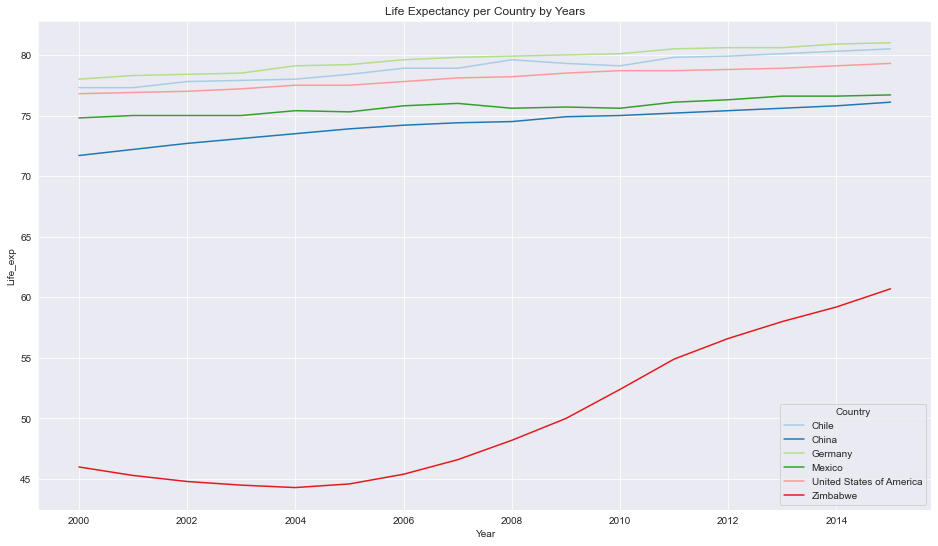

<Figure size 432x288 with 0 Axes>

In [8]:
plt.figure(figsize = (16,9))

sns.lineplot(
data= df,
x = "Year",
y = "Life_exp",
hue = "Country")
sns.set_style("darkgrid")
sns.set_palette("Paired")
plt.title("Life Expectancy per Country by Years")
plt.show()
plt.clf()

### 2. GDP per country by years

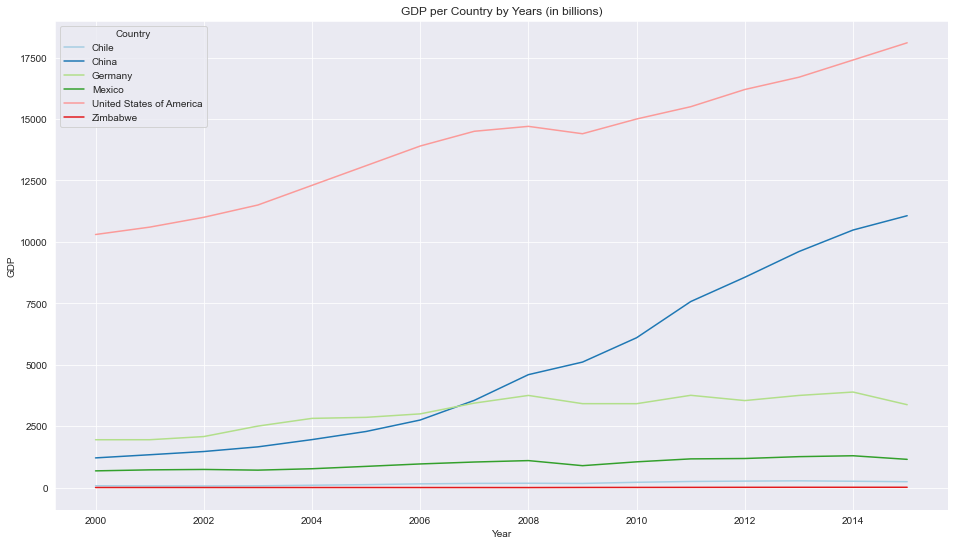

<Figure size 432x288 with 0 Axes>

In [9]:
plt.figure(figsize = (16,9))

sns.lineplot(
data= df,
x = "Year",
y = "GDP",
hue = "Country")
sns.set_style("darkgrid")
sns.set_palette("Paired")
plt.title("GDP per Country by Years (in billions)")
plt.show()
plt.clf()

In [23]:
Germany = df[(df.Country == 'Germany')]
print(Germany.head())


    Country  Year  Life_exp      GDP
32  Germany  2000      78.0  1949.95
33  Germany  2001      78.3  1950.65
34  Germany  2002      78.4  2079.14
35  Germany  2003      78.5  2505.73
36  Germany  2004      79.1  2819.25


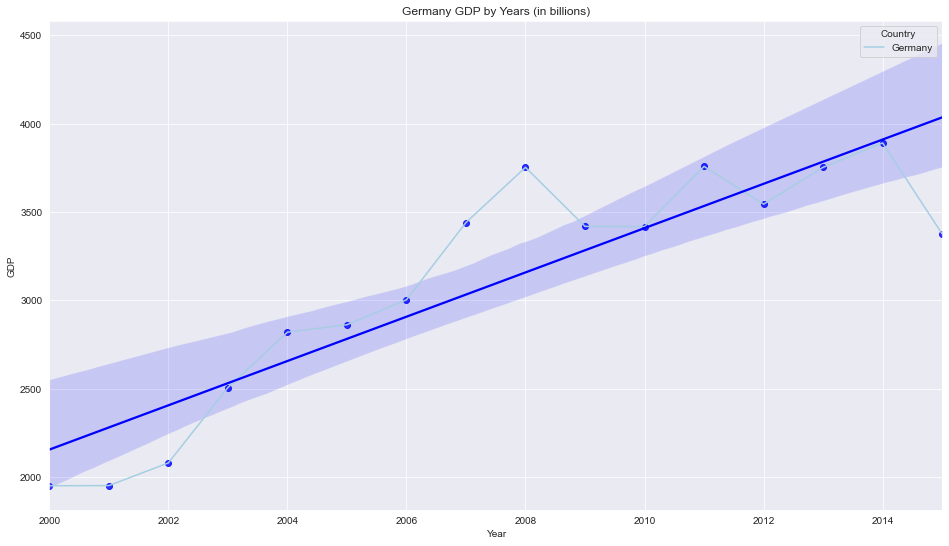

<Figure size 432x288 with 0 Axes>

In [35]:
plt.figure(figsize = (16,9))
sns.lineplot(
data= Germany,
x = "Year",
y = "GDP",
hue = "Country")
sns.regplot(data= Germany,
x = "Year",
y = "GDP",
color = 'Blue')
sns.set_style("darkgrid")
sns.set_palette("Paired")
plt.title("Germany GDP by Years (in billions)")
plt.show()
plt.clf()

In [26]:
Mexico = df[(df.Country == 'Mexico')]
print(Mexico.head())

   Country  Year  Life_exp      GDP
48  Mexico  2000      74.8  683.648
49  Mexico  2001      75.0  724.704
50  Mexico  2002      75.0  741.560
51  Mexico  2003      75.0  713.284
52  Mexico  2004      75.4  770.268


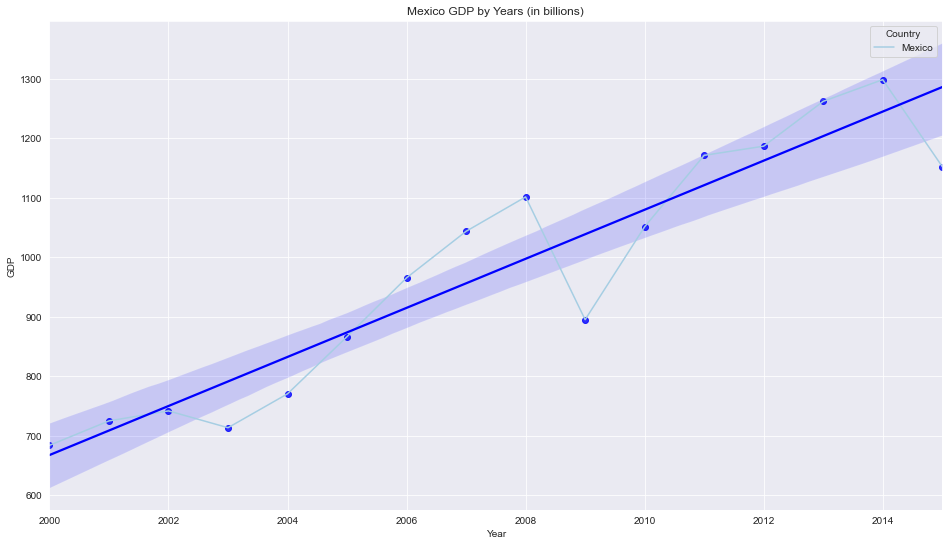

<Figure size 432x288 with 0 Axes>

In [33]:
plt.figure(figsize = (16,9))
sns.lineplot(
data= Mexico,
x = "Year",
y = "GDP",
hue = 'Country')
sns.regplot(data= Mexico,
x = "Year",
y = "GDP",
color = 'Blue')
sns.set_style("darkgrid")
sns.set_palette("Paired")
plt.title("Mexico GDP by Years (in billions)")
plt.show()
plt.clf()

In [36]:
Chile = df[(df.Country == 'Chile')]

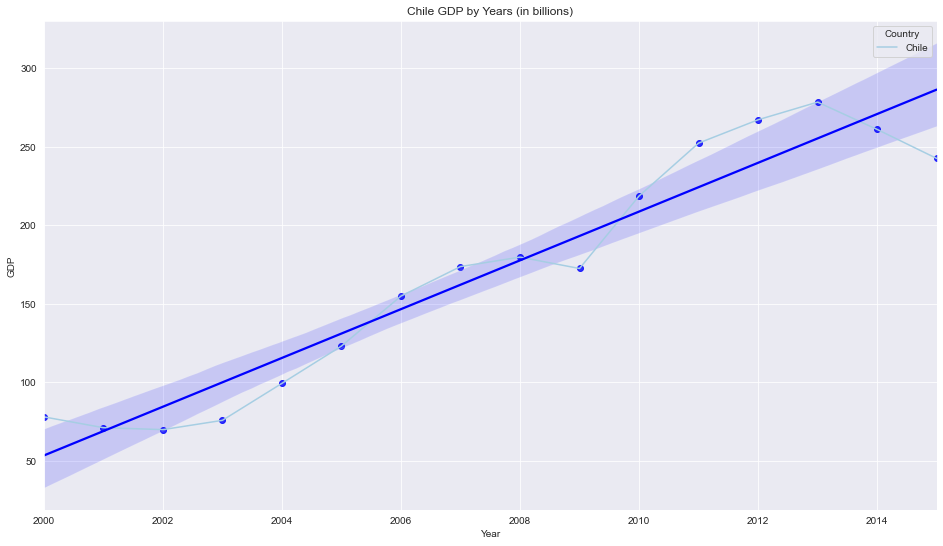

<Figure size 432x288 with 0 Axes>

In [37]:
plt.figure(figsize = (16,9))
sns.lineplot(
data= Chile,
x = "Year",
y = "GDP",
hue = 'Country')
sns.regplot(data= Chile,
x = "Year",
y = "GDP",
color = 'Blue')
sns.set_style("darkgrid")
sns.set_palette("Paired")
plt.title("Chile GDP by Years (in billions)")
plt.show()
plt.clf()

The trendline of Chile's GDP is rising.

In [38]:
Zimbabwe = df[(df.Country == 'Zimbabwe')]

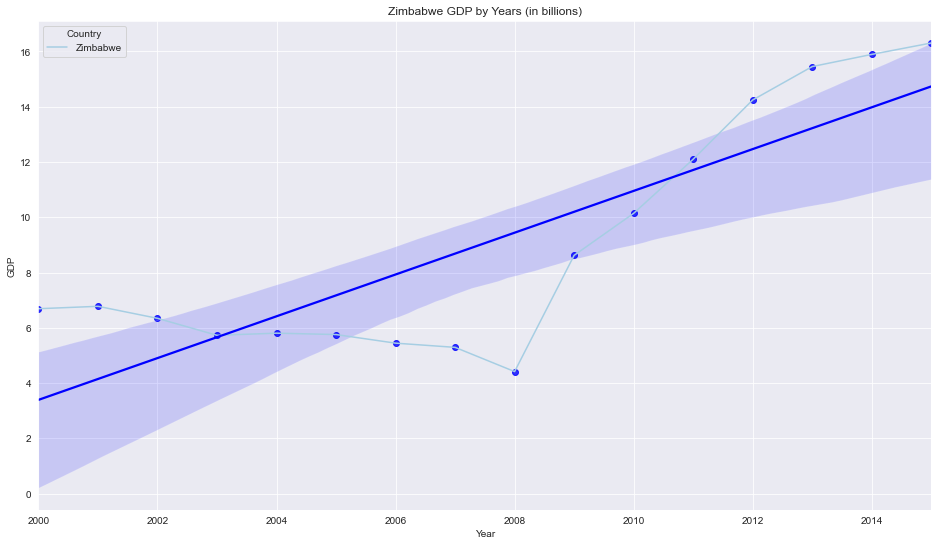

<Figure size 432x288 with 0 Axes>

In [39]:
plt.figure(figsize = (16,9))
sns.lineplot(
data= Zimbabwe,
x = "Year",
y = "GDP",
hue = 'Country')
sns.regplot(data= Zimbabwe,
x = "Year",
y = "GDP",
color = 'Blue')
sns.set_style("darkgrid")
sns.set_palette("Paired")
plt.title("Zimbabwe GDP by Years (in billions)")
plt.show()
plt.clf()

### 3. What is the average life expectancy in these nations?

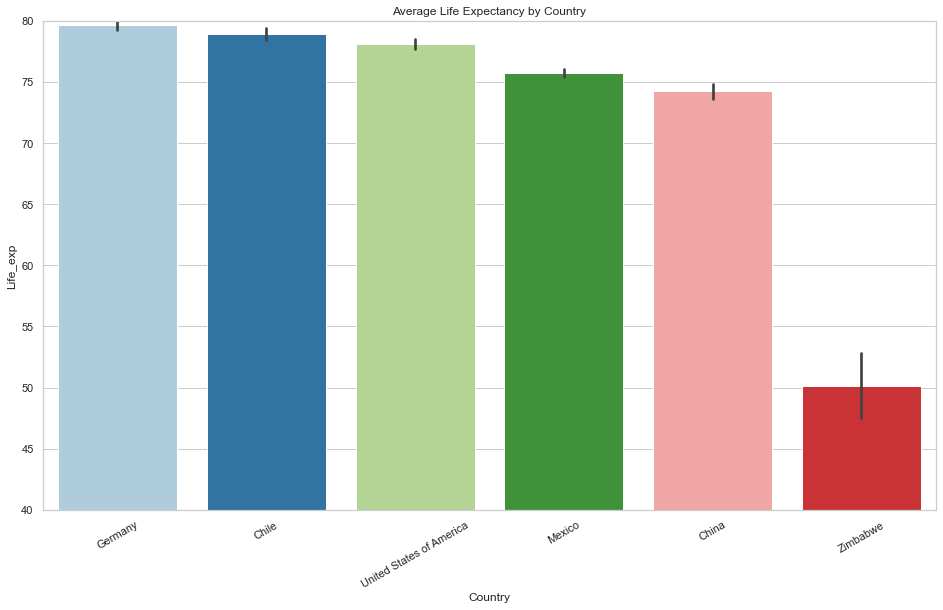

<Figure size 432x288 with 0 Axes>

In [55]:
order = ['Germany', 'Chile', 'United States of America', 'Mexico', 'China', 'Zimbabwe']
plt.figure(figsize = (16,9))
chart = sns.barplot(x="Country", y="Life_exp", data=df, order = order)
sns.set_theme(style="whitegrid")
sns.set_palette("Paired")
chart.set_xticklabels(chart.get_xticklabels(), rotation=30)
chart.set(ylim=(40,80))
plt.title("Average Life Expectancy by Country")
plt.show()
plt.clf()

### 4. Is there a correlation between GDP and life expectancy of a country?

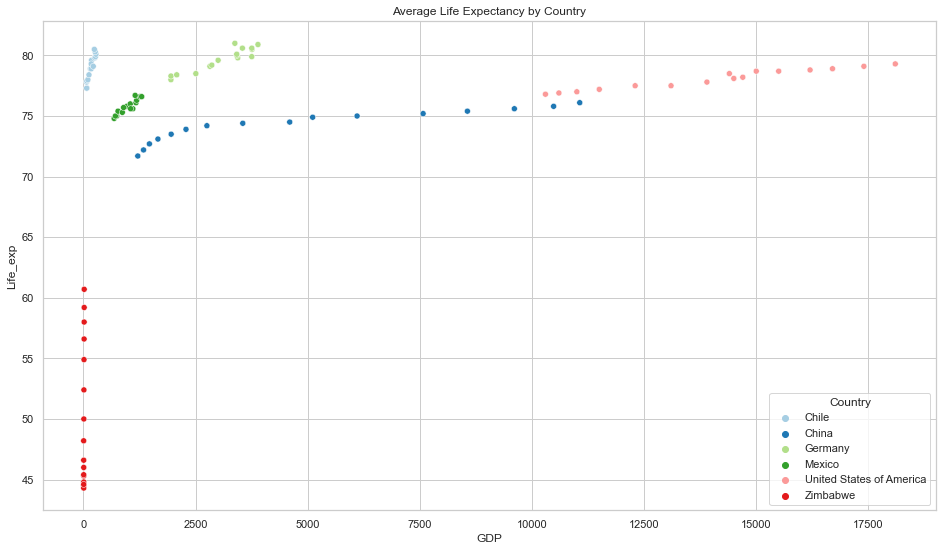

<Figure size 432x288 with 0 Axes>

In [63]:
plt.figure(figsize = (16,9))
chart2 = sns.scatterplot(data = df, x = df['GDP'], y = df['Life_exp'], hue = 'Country')
sns.set_theme(style="whitegrid")
sns.set_palette("Paired")
chart.set_xticklabels(chart.get_xticklabels(), rotation=30)
chart.set(ylim=(40,80))
plt.title("Average Life Expectancy by Country")
plt.show()
plt.clf()

In [64]:
from scipy.stats import pearsonr
corr_price_sqfeet, p = pearsonr(df['GDP'], df['Life_exp'])
print(p)

0.0006187129569469811
